In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
from sklearn.metrics import accuracy_score

In [262]:
data = pd.read_csv("data.csv")
data.columns = ['X','Y']
dataX = data.X
dataY = data.Y

In [263]:
def mean_square_function(expected, predicted):
    return (1/len(expected))*(np.subtract(expected, predicted))

In [264]:
def partial_derivative_with_respect_to_slope(expected, predicted, value_of_x):
    return (-2/len(expected)) * ( np.sum(np.multiply(value_of_x , np.subtract(expected , predicted))))

In [265]:
def partial_derivative_with_respect_to_intercept(expected, predicted):
    return (-2/len(expected)) * ( np.sum(np.subtract(expected , predicted)))

In [266]:
learning_rate = 0.0001
iteration = 1000
#print(dataY.shape)
expected = np.reshape(dataY.values,(len(dataY),1))
X = np.reshape(dataX.values, (len(dataX),1))
# initial value of slope and intercept
slope = 0
intercept = 0
for _ in range(iteration):
    predicted = slope * X + intercept
    #print(slope, intercept)
    slope = slope - learning_rate * partial_derivative_with_respect_to_slope(expected , predicted, X )
    intercept = intercept - learning_rate * partial_derivative_with_respect_to_intercept(expected , predicted)
print(slope,intercept)

1.4796491688889395 0.10148121494753728


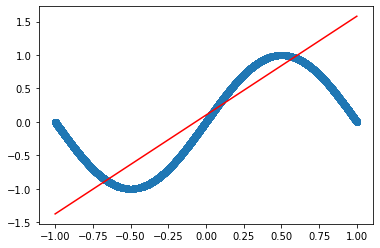

In [274]:
# Making predictions
Y_pred = X*slope + intercept

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# Linear Regression using Least Square Method

## Least Squares method 
Now that we have determined the loss function, the only thing left to do is minimize it. This is done by finding the partial derivative of **L**, equating it to 0 and then finding an expression for **m** and **c**. After we do the math, we are left with these equations:    
  
\\[m = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\]  
  
\\[c = \bar y - m\bar x\\]  
  
Here $\bar x$ is the mean of all the values in the input **X** and $\bar y$ is the mean of all the values in the desired output **Y**. This is the Least Squares method. 
Now we will implement this in python and make predictions.  

In [268]:
def leastSquareMethod(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    slope = np.sum((x - mean_x)*(y - mean_y)) / np.sum((x - mean_x)**2)
    intercept = mean_y - slope * mean_x
    return slope, intercept

In [269]:
leastSquareMethod(X,Y)

(1.287357370010932, 9.908606190326509)

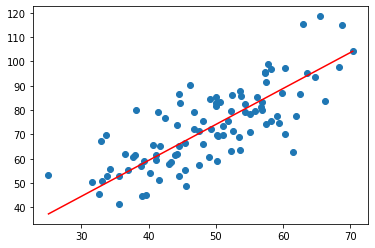

In [270]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [279]:
np.random.seed(123)
X = np.random.uniform(-1,1,10000)
Y = np.sin(np.pi * X)

In [280]:
leastSquareMethod(X,Y)

(0.9651597354847323, 0.009886017993139089)

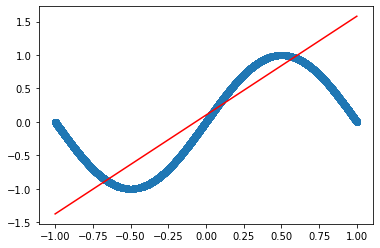

In [281]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [288]:
learning_rate = 0.01
iteration = 10000
expected = np.reshape(Y,(len(Y),1))
data_x   = np.reshape(X, (len(X),1))
# initial value of slope and intercept
slope = 0
intercept = 0
for _ in range(iteration):
    predicted = slope * data_x + intercept
    slope = slope - learning_rate * partial_derivative_with_respect_to_slope(expected , predicted, data_x )
    intercept = intercept - learning_rate * partial_derivative_with_respect_to_intercept(expected , predicted)
print(slope,intercept)

0.9651597354847242 0.009886017993139


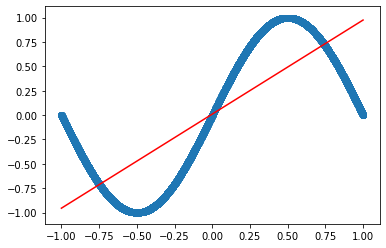

In [289]:
# Making predictions
Y_pred = X*slope + intercept

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()